<a href="https://colab.research.google.com/github/u1-byte/SmartCropYieldsPrediction/blob/main/Machine%20Learning/Code/%5BCrop_Yield%5DML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL UNTUK MEMPREDIKSI TOTAL PRODUKSI BERAS PADA WILAYAH TERTENTU

1.   Input : Suhu, kelembaban, curah hujan, lama penyinaran, luas lahan
2.   Output : Total produksi beras
3.   Scope Input dan Output :  Data diambail rata rata dalam tiap bulan pada Provinsi Jawa Timur 
4.   Sumber : https://dataonline.bmkg.go.id/data_iklim,  https://jatim.bps.go.id/publication/2020/12/28/53ad74b4263660ce4adf0ed3/analisis-data-beras-provinsi-jawa-timur-2018-2020.html

# New Section

In [388]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [357]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Database.csv to Database.csv


# **Exploratory Data Analysis**

In [358]:
# Input data
input_suhu_ratarata = []
input_kelembaban_ratarata = []
input_curah_hujan = []
input_lama_penyinaran = []
input_luas_lahan = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Database - Jawa Timur.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_ratarata.append(float(row[3]))
    input_kelembaban_ratarata.append(float(row[6]))
    input_curah_hujan.append(float(row[7]))
    input_lama_penyinaran.append(float(row[8]))
    input_luas_lahan.append(float(row[9]))
    number+=1

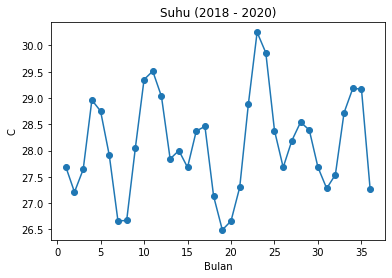

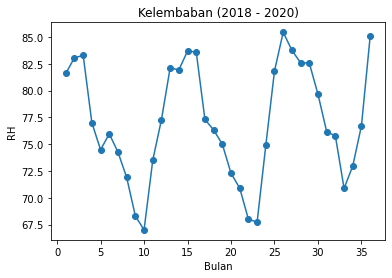

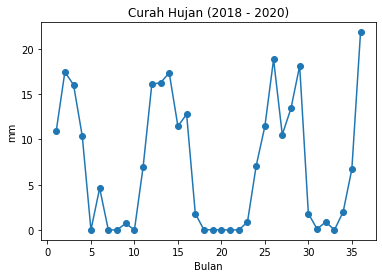

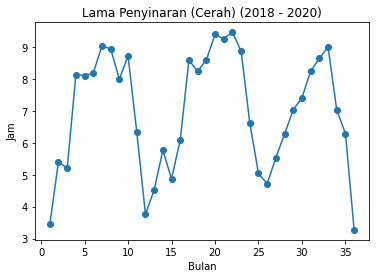

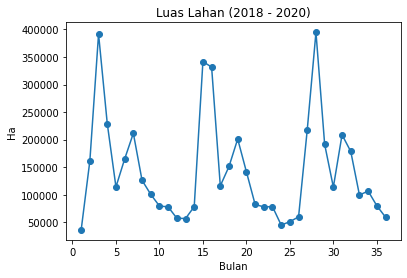

In [359]:
# Grafik dataset

# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_ratarata,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Kelembaban
plt.plot(number_of_input,input_kelembaban_ratarata,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Curah Hujan
plt.plot(number_of_input,input_curah_hujan,marker='o')
plt.title('Curah Hujan (2018 - 2020)')
plt.ylabel('mm')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Lama Penyinaran
plt.plot(number_of_input,input_lama_penyinaran,marker='o')
plt.title('Lama Penyinaran (Cerah) (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Luas Lahan
plt.plot(number_of_input,input_luas_lahan,marker='o')
plt.title('Luas Lahan (2018 - 2020)')
plt.ylabel('Ha')
plt.xlabel('Bulan')
plt.show()

In [360]:
# Output data
output_total_produksi_panen = []
number_of_output = []
number=1

# Baca file.csv
with open('/content/Database - Jawa Timur.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_panen.append(float(row[10]))
    number+=1

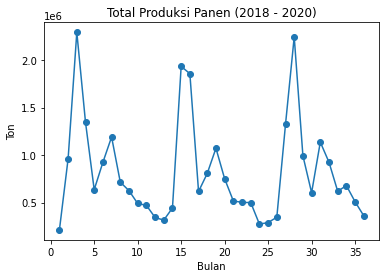

In [8]:
# Grafik data

# Grafik garis dari total produksi beras
plt.plot(number_of_output,output_total_produksi_panen,marker='o')
plt.title('Total Produksi Panen (2018 - 2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# **Data Prepocessing**

In [560]:
# Input dari data pada database
input = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input.append([])
    input[counter].append(float(row[1]))
    input[counter].append(float(row[2]))
    input[counter].append(float(row[3]))
    input[counter].append(float(row[4]))
    input[counter].append(float(row[5]))
    input[counter].append(float(row[6]))
    input[counter].append(float(row[7]))
    input[counter].append(float(row[8]))
    input[counter].append(float(row[9]))
    input[counter].append(float(row[10]))
    input[counter].append(float(row[11]))
    input[counter].append(float(row[12]))
    input[counter].append(float(row[13]))
    input[counter].append(float(row[14]))
    input[counter].append(float(row[15]))
    input[counter].append(float(row[16]))
    input[counter].append(float(row[17]))
    counter+=1

input = np.array(input)

print(input)
print(len(input))

[[2.97700e+01 2.82600e+01 2.80500e+01 2.76900e+01 7.00000e+01 8.00000e+01
  8.10000e+01 8.16100e+01 2.86000e+00 1.10300e+01 1.46900e+01 1.08800e+01
  7.92000e+00 4.51000e+00 4.36000e+00 3.44000e+00 3.61200e+04]
 [2.82600e+01 2.80500e+01 2.76900e+01 2.72100e+01 8.00000e+01 8.10000e+01
  8.16100e+01 8.30700e+01 1.10300e+01 1.46900e+01 1.08800e+01 1.74500e+01
  4.51000e+00 4.36000e+00 3.44000e+00 5.41000e+00 1.61569e+05]
 [2.80500e+01 2.76900e+01 2.72100e+01 2.76400e+01 8.10000e+01 8.16100e+01
  8.30700e+01 8.32900e+01 1.46900e+01 1.08800e+01 1.74500e+01 1.60300e+01
  4.36000e+00 3.44000e+00 5.41000e+00 5.20000e+00 3.91629e+05]
 [2.76900e+01 2.72100e+01 2.76400e+01 2.89600e+01 8.16100e+01 8.30700e+01
  8.32900e+01 7.70000e+01 1.08800e+01 1.74500e+01 1.60300e+01 1.03700e+01
  3.44000e+00 5.41000e+00 5.20000e+00 8.14000e+00 2.29253e+05]
 [2.72100e+01 2.76400e+01 2.89600e+01 2.87500e+01 8.30700e+01 8.32900e+01
  7.70000e+01 7.44800e+01 1.74500e+01 1.60300e+01 1.03700e+01 0.00000e+00
  5.4100

In [561]:
# Output dari data pada database
output = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    output.append([])
    output[counter].append(float(row[19]))
    counter+=1

output = np.array(output)

print(output)
print(len(output))

[[ 2.1133691]
 [ 9.6055539]
 [22.932964 ]
 [13.4546255]
 [ 6.3529704]
 [ 9.2359984]
 [11.9008694]
 [ 7.1460688]
 [ 6.2466323]
 [ 4.8972149]
 [ 4.7015111]
 [ 3.42637  ]
 [ 3.1422876]
 [ 4.4255879]
 [19.337996 ]
 [18.5712826]
 [ 6.1613488]
 [ 8.0630587]
 [10.7132017]
 [ 7.502774 ]
 [ 5.1656494]
 [ 5.01296  ]
 [ 4.9905944]
 [ 2.7225977]
 [ 2.8872113]
 [ 3.4524114]
 [13.2402059]
 [22.4396732]
 [ 9.9209194]
 [ 6.0341993]
 [11.3587236]
 [ 9.241076 ]
 [ 6.1872834]
 [ 6.7832407]
 [ 5.0785959]
 [ 3.6003271]]
36


In [562]:
# Bagi data untuk training dan testing
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.15, shuffle=True)

print(len(input_train))
print(len(input_test))

30
6


In [563]:
# Normalisasi data
scaler_input = MinMaxScaler()
scaler_input.fit(input_train)
input_train_scaled = scaler_input.transform(input_train)
input_test_scaled = scaler_input.transform(input_test)

print(input_train_scaled)
print(input_test_scaled)

[[0.67062315 0.37765957 0.04521277 0.00278552 0.40542005 0.53488372
  0.39349593 0.25997506 0.         0.25427468 0.         0.
  0.77446103 0.78772803 0.92868988 0.91376451 0.25345912]
 [0.89614243 0.67553191 0.35904255 0.37325905 0.35230352 0.61359571
  0.8200542  0.88528678 0.36995754 0.88803089 0.86305732 0.95697739
  0.48258706 0.05306799 0.17910448 0.38640133 0.11878743]
 [0.35311573 0.21010638 0.27925532 0.57381616 0.68617886 0.54680978
  0.47533875 0.19638404 0.09607219 0.00551572 0.04670913 0.
  0.66003317 0.79767828 0.86401327 0.92371476 0.17808551]
 [0.42136499 0.04521277 0.04787234 0.38718663 0.48617886 0.43291592
  0.26558266 0.03553616 0.24469214 0.         0.         0.03971318
  0.78772803 0.92868988 0.91376451 0.75621891 0.18162972]
 [0.46290801 0.7606383  0.80319149 0.66016713 0.0704607  0.
  0.35230352 0.59600998 0.03821656 0.         0.36995754 0.88803089
  0.75621891 0.87728027 0.48258706 0.05306799 0.05985221]
 [0.0504451  0.21542553 0.63829787 1.         0.286720

In [564]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.0001):
      print("The MAE score has reached 0.005")
      self.model.stop_training = True

callbacks = myCallback()

In [565]:
# Model machine learning
model = tf.keras.Sequential([
          tf.keras.layers.Dense(units = 4096, activation="relu", input_dim=17),
          tf.keras.layers.Dense(units = 128, activation="relu"),
          tf.keras.layers.Dense(units = 16,activation="relu"),
          tf.keras.layers.Dense(units = 1, activation="relu")
        ])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mae'])

model.summary()

fitting_history = model.fit(input_train_scaled, output_train, epochs = 300, validation_split=0.15, callbacks=[callbacks])

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_215 (Dense)            (None, 4096)              73728     
_________________________________________________________________
dense_216 (Dense)            (None, 128)               524416    
_________________________________________________________________
dense_217 (Dense)            (None, 16)                2064      
_________________________________________________________________
dense_218 (Dense)            (None, 1)                 17        
Total params: 600,225
Trainable params: 600,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1/1 [==============================] - 1s 543ms/step - loss: 66.8962 - mae: 7.1793 - val_loss: 48.9873 - val_mae: 5.3395
Epoch 2/300
1/1 [==============================] - 0s 32ms/step - loss: 18.6595 - mae: 3.7413 - val_loss: 183.91

<Figure size 432x288 with 0 Axes>

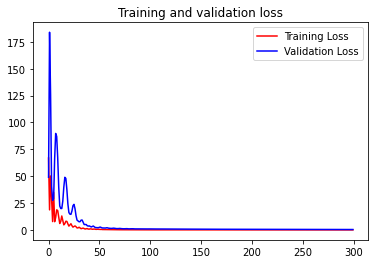

<Figure size 432x288 with 0 Axes>

In [566]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

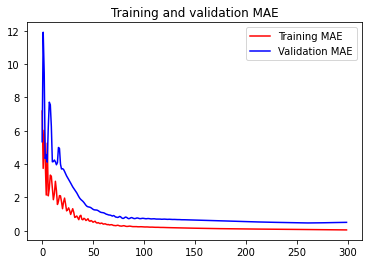

<Figure size 432x288 with 0 Axes>

In [567]:
#grafik training and validation MSE
training_mae=fitting_history.history['mae']
validation_mae=fitting_history.history['val_mae']
epochs=range(len(training_mae))

plt.plot(epochs, training_mae, 'r', label="Training MAE")
plt.plot(epochs, validation_mae, 'b', label="Validation MAE")
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()

In [568]:
# # Simpan model
# model.save('model-crop.h5')

# **Testing Model**

In [569]:
# # Load the model
# model = tf.keras.models.load_model('model-crop.h5')

In [570]:
# Input dari data testing
test_data=[]
number_of_test=[]
counter=0
number=1

for x in input_test_scaled:
  test_data.append([])
  for y in x:
    test_data[counter].append(y)
  counter+=1
  number_of_test.append(number)
  number+=1

total_of_test=len(input_test_scaled)
print(total_of_test)
print(number_of_test)

6
[1, 2, 3, 4, 5, 6]


In [571]:
# Prediksi data validasi
output_prediksi=[]
output_test_plot=[]

for i in range(total_of_test):
  input_prediksi=[]
  input_prediksi.append([])
  for y in test_data[i]:
    input_prediksi[0].append(y)
  prediksi = model.predict(input_prediksi)
  output_prediksi.append(prediksi[0][0])
  output_test_plot.append(output_test[i][0])

print(output_prediksi)
print(output_test_plot)

[6.111469, 4.8572264, 3.879576, 3.6466224, 12.036353, 21.932966]
[6.7832407, 4.8972149, 3.4524114, 3.6003271, 10.7132017, 22.4396732]


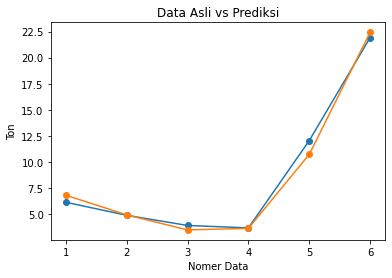

In [572]:
# Grafik garis dari total produksi panen

plt.plot(number_of_test,output_prediksi,marker='o')
plt.plot(number_of_test,output_test_plot,marker='o')
plt.title('Data Asli vs Prediksi')
plt.ylabel('Ton')
plt.xlabel('Nomer Data')
plt.show()

In [573]:
# Menghitung nilai MSE dan MAE
mse_score, mae_score = model.evaluate(input_test_scaled, output_test)
print('Nilai Mean Squared Error (MSE) : ', mse_score)
print('Nilai Mean Absolute Error (MAE) : ', mae_score)

1/1 [==============================] - 0s 18ms/step - loss: 0.4408 - mae: 0.5025
Nilai Mean Squared Error (MSE) :  0.44082877039909363
Nilai Mean Absolute Error (MAE) :  0.5025133490562439
